In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('sample_sales_data.csv')

In [3]:
df.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


### Check the datatypes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7829 non-null   int64  
 1   transaction_id  7829 non-null   object 
 2   timestamp       7829 non-null   object 
 3   product_id      7829 non-null   object 
 4   category        7829 non-null   object 
 5   customer_type   7829 non-null   object 
 6   unit_price      7829 non-null   float64
 7   quantity        7829 non-null   int64  
 8   total           7829 non-null   float64
 9   payment_type    7829 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 611.8+ KB


### Dropping irrelvant columns

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


### Checking for duplicated rows

In [7]:
df.duplicated().value_counts()

False    7829
dtype: int64

### Checking for null values

In [8]:
df.isnull().sum()

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
unit_price,7829.0,7.819480,5.388088,0.19,3.99,7.19,11.19,23.99
quantity,7829.0,2.501597,1.122722,1.00,1.00,3.00,4.00,4.00
total,7829.0,19.709905,17.446680,0.19,6.57,14.97,28.47,95.96


### Distribution of Numerical columns

In [10]:
def box_QQ_hist(df,column):
    plt.figure(figsize=(13,5))
    plt.subplot(1,3,1)
    sns.boxplot(df[column])
    plt.subplot(1,3,2)
    stats.probplot(df[column],plot=plt)
    plt.subplot(1,3,3)
    plt.hist(df[column],bins=30)
    plt.xlabel(column)
    plt.show()

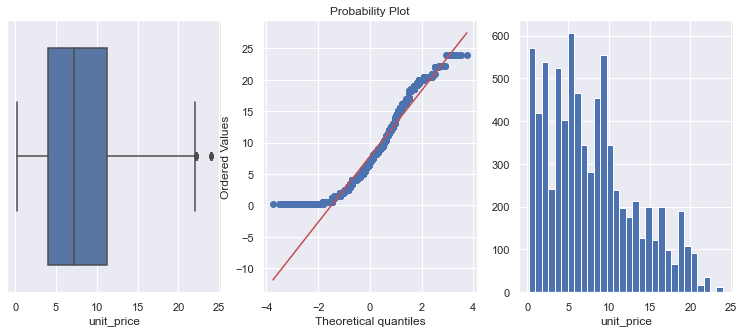

In [11]:
box_QQ_hist(df,'unit_price')

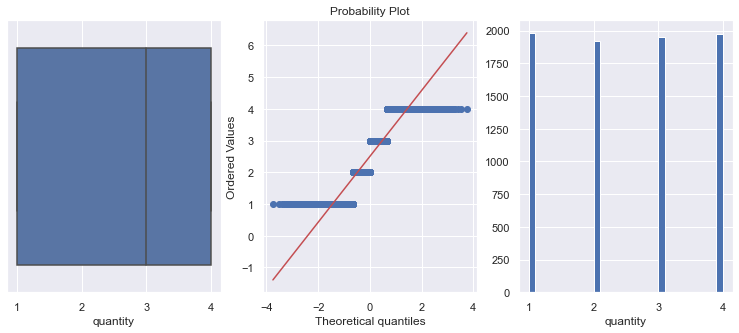

In [12]:
box_QQ_hist(df,'quantity')

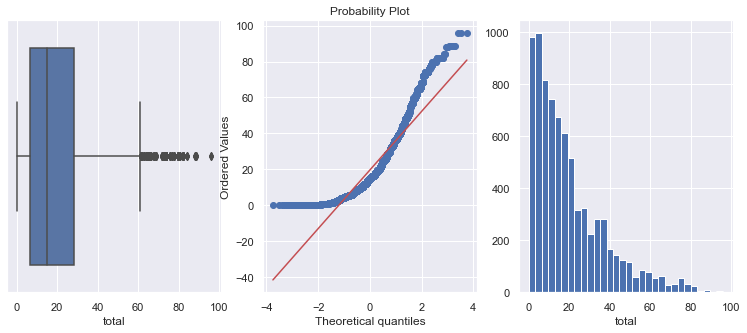

In [13]:
box_QQ_hist(df,'total')

### Univariate Analysis

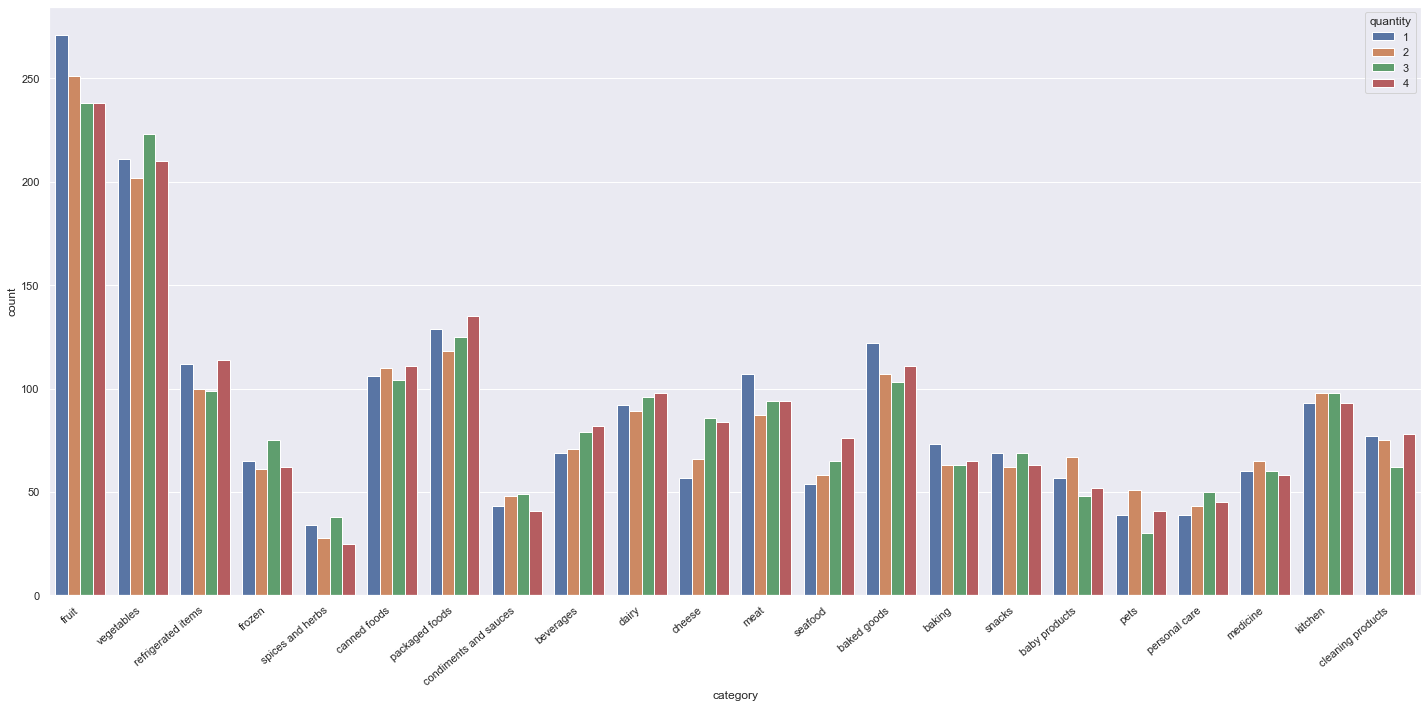

category
fruit             2439
vegetables        2124
packaged foods    1280
Name: quantity, dtype: int64


In [14]:
plt.figure(figsize=(20,10))
ax=sns.countplot(df['category'],hue=df["quantity"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
print(df.groupby('category').sum()['quantity'].sort_values(ascending=False).head(3))

- 1st Top Seller : Fruits
- 2nd Top Seller : Vegetables
- 3rd Top Seller : Packaged Foods

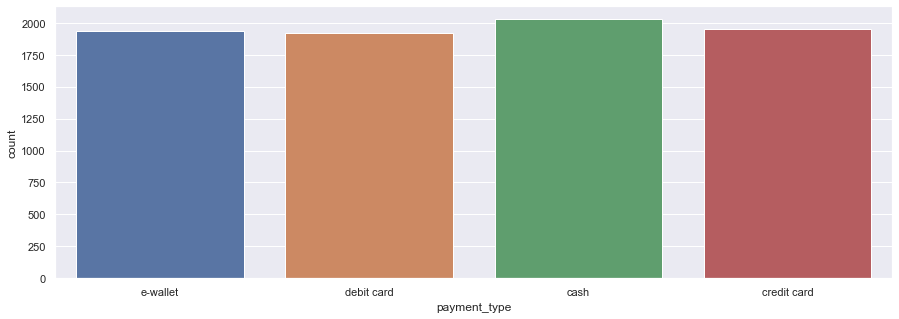

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(df['payment_type'])
plt.show()

- Most of the customers used cash to pay

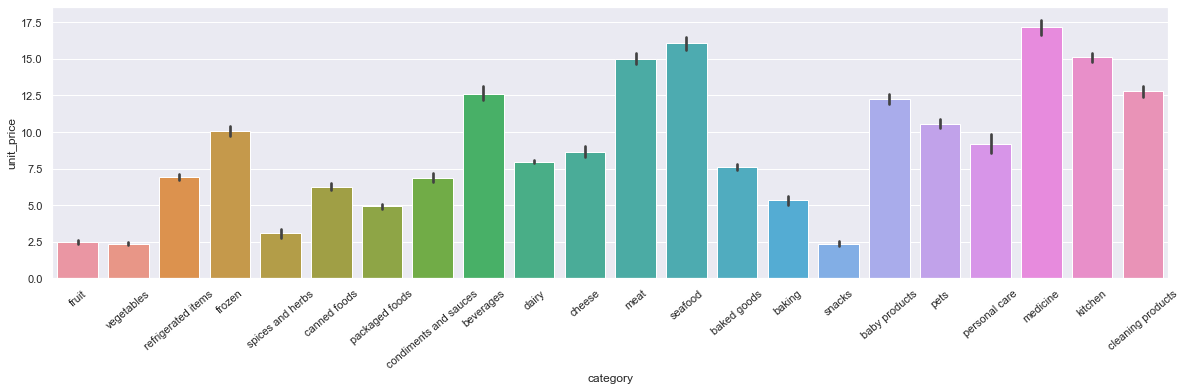

category
medicine    23.99
meat        20.49
seafood     20.49
Name: unit_price, dtype: float64


In [16]:
plt.figure(figsize=(20,5))
ax=sns.barplot(x='category',y='unit_price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40)
plt.show()
print(df.groupby('category').max()['unit_price'].sort_values(ascending=False).head(3))

- Medicine has the highest price among all categories

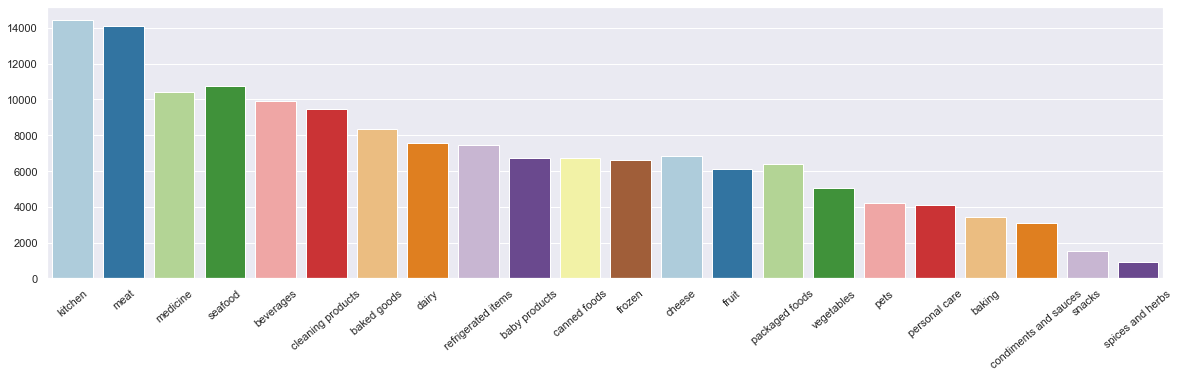

category
kitchen    14456.65
meat       14102.31
seafood    10754.81
Name: total, dtype: float64


In [17]:
plt.figure(figsize=(20,5))
ax=sns.barplot(x=list(df.groupby('category').sum().sort_values(by='unit_price',ascending=False).index),
               y=list(df.groupby('category').sum().sort_values(by='unit_price',ascending=False).iloc[:,2]),
               data=df,palette='Paired')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40)
plt.show()
print(df.groupby('category').sum()['total'].sort_values(ascending=False).head(3))

- Though Fruits are top seller, Kitchen category contibutes highest sale


### DateTime Series Analysis


In [18]:
df['timestamp']=pd.to_datetime(df["timestamp"]) ## converting to datetime dtype

In [19]:
df['date']= df['timestamp'].dt.date ## Extracting date from timestamp
df['date']=pd.to_datetime(df['date'])

In [20]:
df['day']= df['date'].dt.day_name() ## Extracting day

In [21]:
df.date.sort_values().unique()

array(['2022-03-01T00:00:00.000000000', '2022-03-02T00:00:00.000000000',
       '2022-03-03T00:00:00.000000000', '2022-03-04T00:00:00.000000000',
       '2022-03-05T00:00:00.000000000', '2022-03-06T00:00:00.000000000',
       '2022-03-07T00:00:00.000000000'], dtype='datetime64[ns]')

In [22]:
df.iloc[:,[1,3,4,5,6,7,8,9,10]].head()

,timestamp,category,customer_type,unit_price,quantity,total,payment_type,date,day
0,2022-03-02 09:51:38,fruit,gold,3.99,2,7.98,e-wallet,2022-03-02,Wednesday
1,2022-03-06 10:33:59,fruit,standard,3.99,1,3.99,e-wallet,2022-03-06,Sunday
2,2022-03-04 17:20:21,fruit,premium,0.19,2,0.38,e-wallet,2022-03-04,Friday
3,2022-03-02 17:23:58,fruit,gold,0.19,4,0.76,e-wallet,2022-03-02,Wednesday
4,2022-03-05 14:32:43,fruit,basic,4.49,2,8.98,debit card,2022-03-05,Saturday


- Goal : To find Top selling category in each day of the week
- Work : One-Hot Encoded, 'Day' column and multipied quantities of each category with their respective day.

In [23]:
con_df=pd.concat([df, pd.get_dummies(df['day'])],axis=1) ## One-Hot Encoding Day columns

In [24]:
con_df.head(2)

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,date,day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,2022-03-02,Wednesday,0,0,0,0,0,0,1
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,2022-03-06,Sunday,0,0,0,1,0,0,0


In [25]:
for i in range(len(con_df['quantity'])):
    con_df['Wednesday'][i]=con_df['quantity'][i] * con_df.loc[:,"Wednesday"][i]
    con_df['Thursday'][i]=con_df['quantity'][i] * con_df.loc[:,"Thursday"][i]
    con_df['Friday'][i]=con_df['quantity'][i] * con_df.loc[:,"Friday"][i]
    con_df['Saturday'][i]=con_df['quantity'][i] * con_df.loc[:,"Saturday"][i]
    con_df['Sunday'][i]=con_df['quantity'][i] * con_df.loc[:,"Sunday"][i]
    con_df['Monday'][i]=con_df['quantity'][i] * con_df.loc[:,"Monday"][i]
    con_df['Tuesday'][i]=con_df['quantity'][i] * con_df.loc[:,"Tuesday"][i]

In [26]:
Daily_df=pd.DataFrame(con_df.groupby('category').sum()[['Sunday','Monday','Tuesday','Wednesday'
                                                        ,'Thursday','Friday','Saturday']]) 

In [27]:
Daily_df

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
category,,,,,,,
baby products,66.0,94.0,77.0,83.0,77.0,77.0,69.0
baked goods,176.0,120.0,174.0,172.0,166.0,141.0,140.0
baking,108.0,83.0,109.0,85.0,110.0,86.0,67.0
beverages,131.0,87.0,112.0,102.0,131.0,91.0,122.0
canned foods,167.0,135.0,184.0,160.0,157.0,139.0,140.0
cheese,75.0,127.0,113.0,132.0,94.0,133.0,109.0
cleaning products,109.0,108.0,73.0,108.0,127.0,134.0,66.0
condiments and sauces,79.0,51.0,73.0,74.0,59.0,68.0,46.0
dairy,128.0,137.0,138.0,152.0,116.0,138.0,141.0


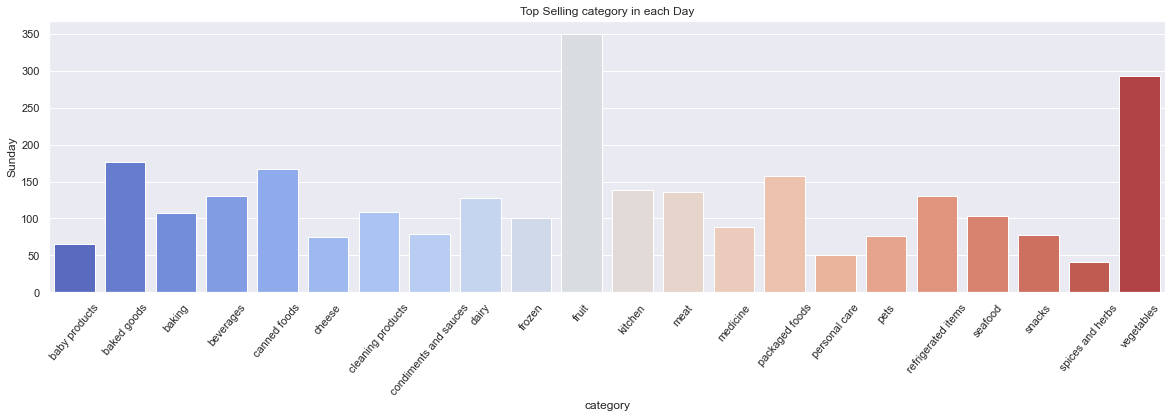

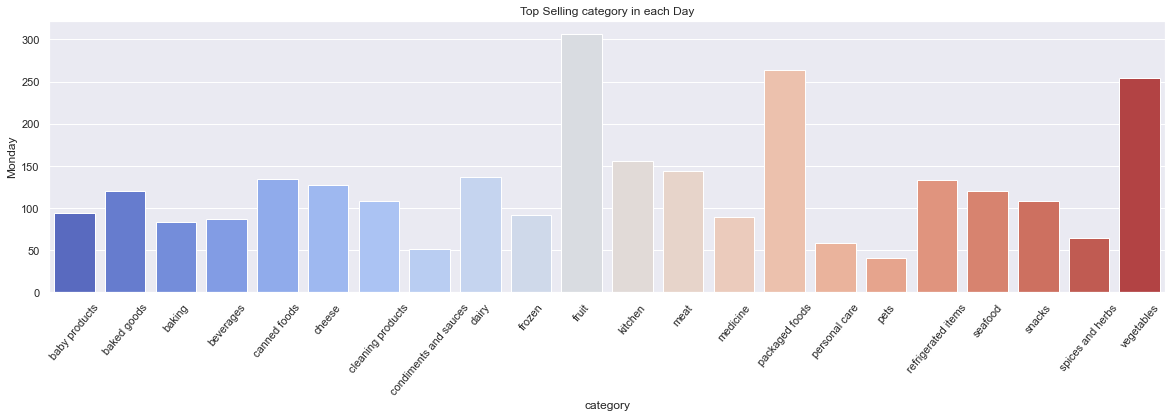

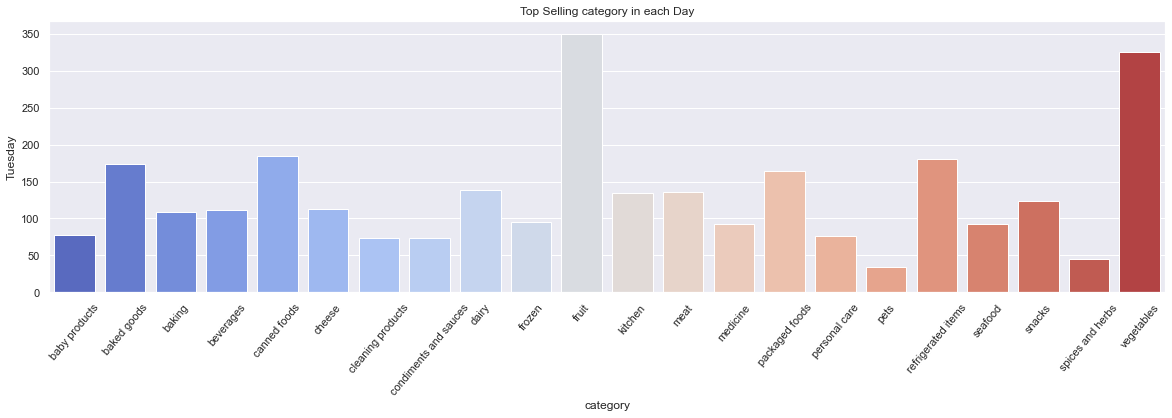

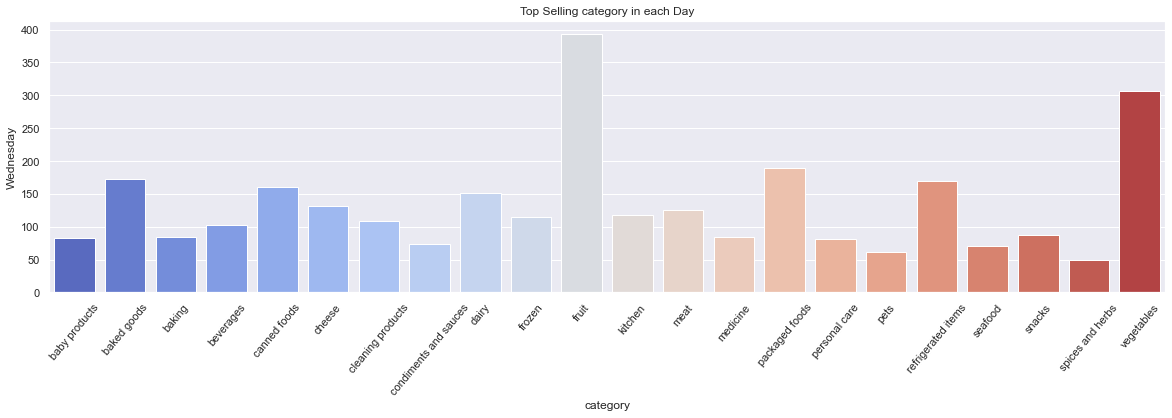

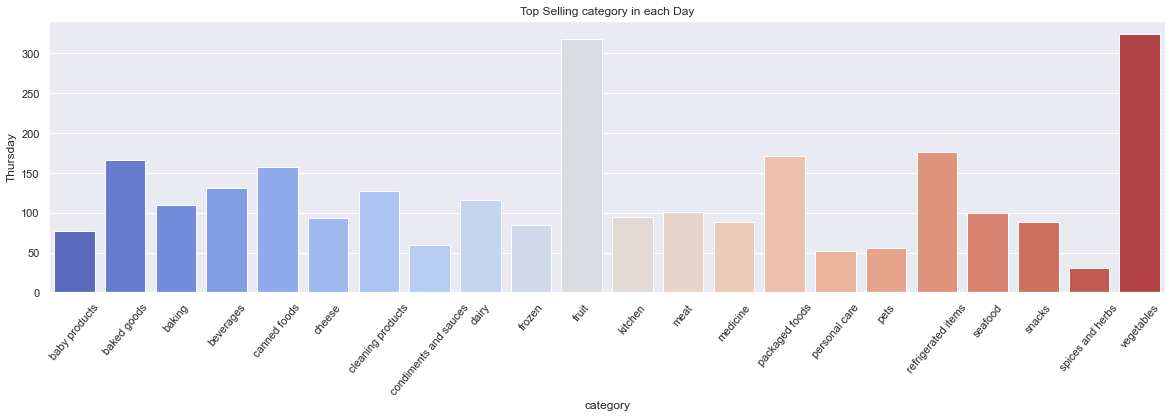

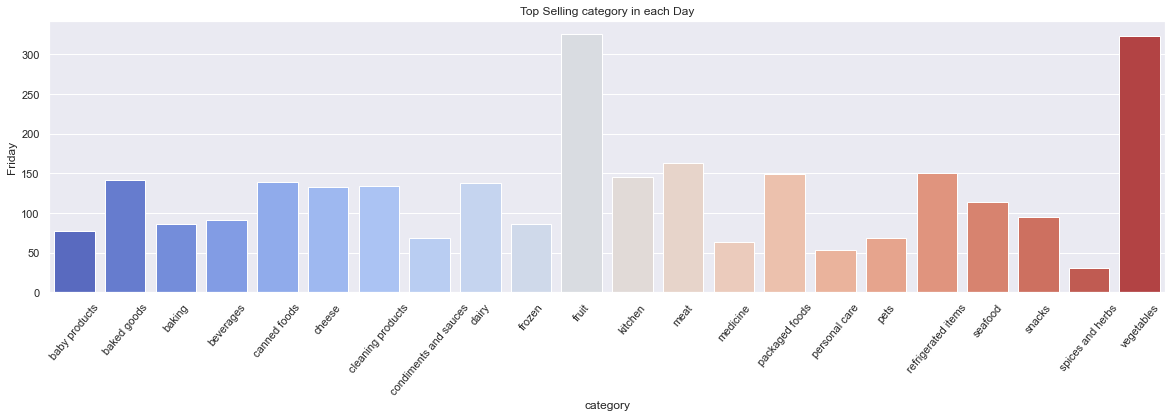

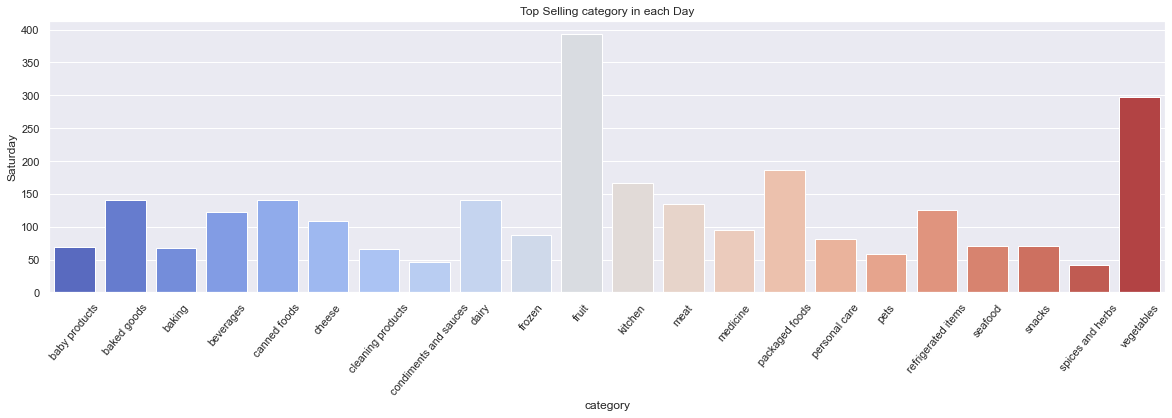

In [28]:
for i in range(len(Daily_df.columns)):
    plt.figure(figsize=(20,5))
    ax=sns.barplot(x=Daily_df.index,y=Daily_df.iloc[:,i],data=Daily_df,palette='coolwarm')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=50)
    plt.title("Top Selling category in each Day")
    plt.show()

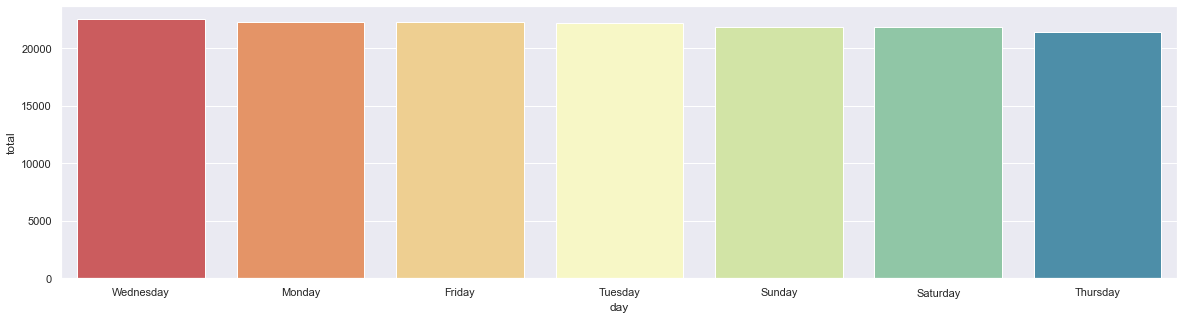

In [29]:
plt.figure(figsize=(20,5))
sns.barplot(x=df.groupby('day').sum().sort_values(by='total',ascending=False).index,
            y=df.groupby('day').sum().sort_values(by='total',ascending=False).total,
            data=df,palette='Spectral')
plt.show()

- Wednesday yielded highest revenue among all days